# Klasyfikacja w Pythonie

**zad. 1** Które z poniższych problemów jest problemem regresji, a które klasyfikacji?
 1. Sprawdzenie, czy wiadomość jest spamem.
 1. Przewidzenie oceny (od 1 do 5 gwiazdek) na podstawie komentarza.
 1. OCR cyfr: rozpoznanie cyfry z obrazka.
 
 Jeżeli problem jest klasyfikacyjny, to jakie mamy klasy?

In [ ]:
problemy klasyfikacji: 1) klasy: wiadomość jest spamem lub wiadomość nie jest spamem , 3) klasy to cyfry od 0 do 9
problem regresji: 2) Przewidzenie oceny (od 1 do 5 gwiazdek) na podstawie komentarza.

## Miary dla klasyfikacji

Istnieje wieje miar (metryk), na podstawie których możemy ocenić jakość modelu. Podobnie jak w przypadku regresji liniowej potrzebne są dwie listy: lista poprawnych klas i lista predykcji z modelu. Najpopularniejszą z metryk jest trafność, którą definiuje się w następujący sposób:
 $$ACC = \frac{k}{N}$$ 
 
 gdzie: 
  * $k$  to liczba poprawnie zaklasyfikowanych przypadków,
  * $N$ liczebność zbioru testującego.

**zadanie** Napisz funkcję, która jako parametry przyjmnie dwie listy (lista poprawnych klas i wyjście z klasyfikatora) i zwróci trafność.

In [4]:
def accuracy_measure(true, predicted):
    sum=0 
    for i in range(len(predicted)):
        if predicted[i]==true[i]:
            sum+=1
    return (sum/len(true))            

true_label = [1, 1, 1, 0, 0]
predicted = [0, 1, 0, 1, 0]
print("ACC:", accuracy_measure(true_label, predicted))

ACC: 0.4


## Klasyfikator $k$ najbliższych sąsiadów *(ang. k-nearest neighbors, KNN)*

Klasyfikator [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), który został wprowadzony na ostatnim wykładzie, jest bardzo intuicyjny. Pomysł, który stoi za tym klasyfikatorem jest bardzo prosty: Jeżeli mamy nowy obiekt do zaklasyfikowania, to szukamy wśród danych trenujących $k$ najbardziej podobnych do niego przykładów i na ich podstawie decydujemy (np. biorąc większość) do jakie klasy powinien należeć dany obiekt.

** Przykład 1** Mamy za zadanie przydzielenie obiektów do dwóch klas: trójkątów lub kwadratów. Rozpatrywany obiekt jest zaznaczony zielonym kółkiem. Przyjmując $k=3$, mamy wśród sąsiadów 2 trójkąty i 1 kwadrat. Stąd obiekt powinienm zostać zaklasyfikowany jako trójkąt. Jak zmienia się sytuacja, gdy przyjmiemy $k=5$?

![Przykład 1](./220px-KnnClassification.svg.png)

## Herbal Iris

*Herbal Iris* jest klasycznym zbiorem danych w uczeniu maszynowym, który powstał w 1936 roku. Zawiera on informacje na 150 egzemplarzy roślin, które należą do jednej z 3 odmian.

**zad. 2** Wczytaj do zmiennej ``data`` zbiór *Herbal Iris*, który znajduje się w pliku ``iris.data``. Jest to plik csv.

In [5]:
import pandas as pd
data = pd.read_csv("iris.data")

**zad. 3** Odpowiedz na poniższe pytania:
 1. Które atrybuty są wejściowe, a w której kolumnie znajduje się klasa wyjściowa?
 1. Ile jest różnych klas? Wypisz je ekran.
 1. Jaka jest średnia wartość w kolumnie ``sepal_length``? Jak zachowuje się średnia, jeżeli policzymy ją dla każdej z klas osobno?

In [6]:
#ODP.1 atrybuty wejściowe: sepal_length, sepal_width, petal_length, petal_width
#  klasa wyjściowa to kolumna class

#ODP.2
data.groupby(["class"])[["class"]].count() # 3 różne klasy

,class
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [31]:
#ODP.3 średnia wartośc w kolumnie sepal_length
data["sepal_length"].mean() #5.843333333333335

5.843333333333335

In [8]:
#ODP.3 średnia wartość sepal_length dla każdej z klas osobno
data.groupby(["class"])[["sepal_length"]].mean()

,sepal_length
class,
Iris-setosa,5.006
Iris-versicolor,5.936
Iris-virginica,6.588


Wytrenujmy klasyfikator *KNN*, ale najpierw przygotujmy dane. Fukcja ``train_test_split`` dzieli zadany zbiór danych na dwie części. My wykorzystamy ją do podziału na zbiór treningowy (66%) i testowy (33%), służy do tego parametr ``test_size``.

In [13]:
from sklearn.model_selection import train_test_split

X = data.loc[:, 'sepal_length':'petal_width']
Y = data['class']

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size=0.33, random_state=42)

Trenowanie klasyfikatora wygląda bardzo podobnie do treningi modelu regresji liniowej:

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Mając wytrenowany model możemy wykorzystać go do predykcji na zbiorze testowym.

In [15]:
predicted = model.predict(test_X)

for i in range(10):
    print("Zaklasyfikowane: {}, Orginalne: {}".format(predicted[i], test_Y.reset_index()['class'][i]))


Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-virginica, Orginalne: Iris-virginica
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-virginica, Orginalne: Iris-virginica
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor


Możemy obliczyć *accuracy*:

In [16]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_Y, predicted))

0.98


**zad. 4** Wytrenuj nowy model ``model_2`` zmieniając liczbę sąsiadów na 20. Czy zmieniły się wyniki?

In [17]:
model_2 = KNeighborsClassifier(n_neighbors=20)
model_2.fit(train_X, train_Y)

predicted_2 = model_2.predict(test_X)

for i in range(10):
    print("Zaklasyfikowane: {}, Orginalne: {}".format(predicted_2[i], test_Y.reset_index()['class'][i]))

print(accuracy_score(test_Y, predicted_2))

Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-virginica, Orginalne: Iris-virginica
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-virginica, Orginalne: Iris-virginica
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
1.0


**zad. 5**   Wytrenuj model z $k=1$. Przeprowadź walidację na zbiorze trenującym zamiast na zbiorze testowym? Jakie wyniki otrzymałeś? Czy jest to wyjątek? Dlaczego tak się dzieje?

In [18]:
model_3 = KNeighborsClassifier(n_neighbors=1)
model_3.fit(train_X, train_Y)

predicted_3 = model_3.predict(train_X)

for i in range(10):
    print("Zaklasyfikowane: {}, Orginalne: {}".format(predicted_3[i], train_Y.reset_index()['class'][i]))

print(accuracy_score(train_Y, predicted_3))
#dzieje się tak ponieważ przeprowadzamy walidację na zbiorze treningowym

Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-virginica, Orginalne: Iris-virginica
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-virginica, Orginalne: Iris-virginica
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-setosa, Orginalne: Iris-setosa
Zaklasyfikowane: Iris-versicolor, Orginalne: Iris-versicolor
1.0


## Walidacja krzyżowa

Zbiór *herbal Iris* jest bardzo małym zbiorem. Wydzielenie z niego zbioru testowego jest obciążone dużą wariancją wyników, tj. w zależności od sposoby wyboru zbioru testowego wyniki mogą się bardzo różnic. Żeby temu zaradzić, stosuje się algorytm [walidacji krzyżowej](https://en.wikipedia.org/wiki/Cross-validation_(statistics). Algorytm wygląda następująco:
 1. Podziel zbiór danych na $n$ części (losowo).
 1. Dla każdego i od 1 do $n$ wykonaj:
  1. Weź $i$-tą część jako zbiór testowy, pozostałe dane jako zbiór trenujący.
  1. Wytrenuj model na zbiorze trenującym.
  1. Uruchom model na danych testowych i zapisz wyniki.
 1. Ostateczne wyniki to średnia z $n$ wyników częściowych. 
 
 W Pythonie służy do tego funkcja ``cross_val_score``, która przyjmuje jako parametry (kolejno) model, zbiór X, zbiór Y. Możemy ustawić parametr ``cv``, który określa na ile części mamy podzielić zbiór danych oraz parametr ``scoring`` określający miarę.
 
 W poniższym przykładzie dzielimy zbiór danych na 10 części (10-krotna walidacja krzyżowa) i jako miarę ustawiany celność (ang. accuracy).

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print("Wynik walidacji krzyżowej:", scores.mean())

**zad. 6** Klasyfikator $k$ najbliższych sąsiadów posiada jeden parametr: $k$, który określa liczbę sąsiadów podczas klasyfikacji. Jak widzieliśmy, wybór $k$ może mieć duże znaczenie dla jakości klasyfikatora. Wykonaj:
 1. Stwórz listę ``neighbors`` wszystkich liczb nieparzystych od 1 do 50.
 1. Dla każdego elementu ``i`` z listy ``neighbors`` zbuduj klasyfikator *KNN* o liczbie sąsiadów równej ``i``. Nastepnie przeprowadz walidację krzyżową (parametry takie same jak powyżej) i zapisz wyniki do tablicy ``cv_scores``.
 1. Znajdź ``k``, dla którego klasyfikator osiąga najwyższy wynik.

In [28]:
from sklearn.model_selection import cross_val_score

neighbors=[]

for i in range(50):
    if (i%2!=0):
        neighbors.append(i)

cv_scores=[]

def my_knn(i):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    return(scores.mean())

for i in neighbors:
    cv_scores.append(my_knn(i))
    

max_k=neighbors[cv_scores.index(max(cv_scores))] #max wynik 
print("K dla którego klasyfikator osiąga najwyższy wynik to: ",max_k)

K dla którego klasyfikator osiąga najwyższy wynik to:  13


Wykres przedstawiający precent błedów w zależnosci od liczby sąsiadów.

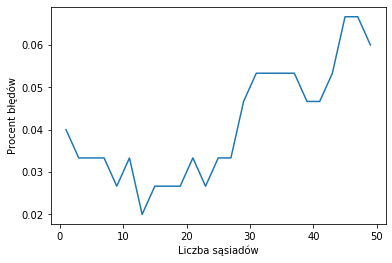

In [30]:
import matplotlib.pyplot as plt
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Liczba sąsiadów')
plt.ylabel('Procent błędów')
plt.show()

Przejdź teraz do arkusza z zadaniem domowym, gdzie zastosujemy klasyfikator *kNN* na zbiorze danych z pierwszych zajęć.